In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict # dictionary implementation without initialization

In [2]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Network-Theory-and-Applications/main/Assignment2/dolphin_edges.csv
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Network-Theory-and-Applications/main/Assignment2/dolphin_nodes.csv

--2022-03-13 13:52:30--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Network-Theory-and-Applications/main/Assignment2/dolphin_edges.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 915 [text/plain]
Saving to: ‘dolphin_edges.csv’

dolphin_edges.csv   100%[===================>]     915  --.-KB/s    in 0s      

2022-03-13 13:52:31 (54.8 MB/s) - ‘dolphin_edges.csv’ saved [915/915]

--2022-03-13 13:52:31--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Network-Theory-and-Applications/main/Assignment2/dolphin_nodes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP r

In [3]:
pd.read_csv("dolphin_edges.csv")

,x,y
0,4,9
1,6,10
2,7,10
3,1,11
4,3,11
...,...,...
154,46,60
155,33,61
156,3,62
157,38,62


In [4]:
edges=np.array(pd.read_csv("dolphin_edges.csv"))

In [5]:
min(edges[:,0])

1

In [6]:
class Graph:
  def __init__(self):
    self.graph=defaultdict(list) # dictionary to store neighbours

  def add_edge(self,n1,n2):
    self.graph[n1].append(n2) # adding neighbours
    self.graph[n2].append(n1)

  def remove_edge(self,n1,n2): # removing edges 
    self.graph[n1].remove(n2)
    self.graph[n2].remove(n1)

  def remove_node(self,n): # removing a node from network 
    del self.graph[n]
    for i in self.graph:
      if n in self.graph[i]:
        self.graph[i].remove(n)

  def min_distance(self,dist): # updates distance of nodes
    min=10**10
    #min_index=0
    for node in self.graph:
      if dist[node]<min and self.visited[node]==False:
        #print("working!")
        min=dist[node]
        min_index=node
    return min_index

  def dijsktra(self,src): # dijsktra algorithm to find the shortest distance between a node and all other nodes.
    dist=[10**10 for i in range(len(self.graph))]
    dist[src]=0
    self.visited=[False] * len(self.graph)
    for node in range(len(self.graph)):
      x=self.min_distance(dist)
      self.visited[x]=True
      for node2 in range(len(self.graph)):
        if  node2 in self.graph[x] and self.visited[node2]==False :
          if dist[node2]>dist[x]+1:
            dist[node2]=dist[x]+1
    return dist

  def closeness_centrality(self): # for each node finds the distances from other nodes and then computes closeness centrality 
    cc=[]
    for i in range(len(self.graph)):
      distance=self.dijsktra(i)
      cc.append(1/np.mean(distance))
    return cc

  def assortativity_coefficient(self): # computes assortiviity index based on expression discussed in textbook
    degrees=[len(self.graph[i]) for i in range(len(self.graph))]
    r1=0
    r2=0
    m2=sum(degrees)
    for i in range(len(self.graph)):
      for j in range(len(self.graph)):
        aij=0
        if j in self.graph[i]:
          aij=1
        r1+=(aij-(degrees[i]*degrees[j]/m2))*(degrees[i]*degrees[j])
        dij=0
        if i==j:
          dij=1
        r2+=(degrees[i]*dij-(degrees[i]*degrees[j]/m2))*(degrees[i]*degrees[j])
    return r1/r2
  def nodes_less_than_degree_k(self,k): # function to remove nodes with less than degree k.
    num=0
    nodes=[]
    for i in self.graph.keys():
      if len(self.graph[i])<k:
        num+=1
        nodes.append(i)
    #print(len(nodes))
    for node in nodes:
      self.remove_node(node)
    return num

  def kcores(self,k): # computes the k core of a graph , by removing nodes with degree less than k until no such nodes are left.
    num=self.nodes_less_than_degree_k(k)
    while(num!=0):
      num=self.nodes_less_than_degree_k(k)
      #print(len(self.graph),num)
    return self.graph,len(self.graph)
    

In [7]:
graph=Graph()
for i in edges:
  graph.add_edge(i[0]-1,i[1]-1)

In [11]:
len(graph.graph)

62

In [8]:
closeness_centrality=graph.closeness_centrality()
assortativity_coefficient=graph.assortativity_coefficient()

In [9]:
closeness_centrality

[0.35227272727272724,
 0.3780487804878049,
 0.28703703703703703,
 0.31313131313131315,
 0.2530612244897959,
 0.2421875,
 0.2719298245614035,
 0.37125748502994016,
 0.36904761904761907,
 0.256198347107438,
 0.317948717948718,
 0.2530612244897959,
 0.27312775330396477,
 0.27555555555555555,
 0.3827160493827161,
 0.34444444444444444,
 0.33513513513513515,
 0.3147208121827411,
 0.3425414364640884,
 0.3212435233160622,
 0.3974358974358974,
 0.33879781420765026,
 0.2412451361867704,
 0.33879781420765026,
 0.317948717948718,
 0.2594142259414226,
 0.2818181818181818,
 0.3212435233160622,
 0.37125748502994016,
 0.328042328042328,
 0.328042328042328,
 0.2412451361867704,
 0.21985815602836878,
 0.37125748502994016,
 0.3212435233160622,
 0.24899598393574293,
 0.4246575342465753,
 0.40522875816993464,
 0.33513513513513515,
 0.34065934065934067,
 0.4105960264900662,
 0.3024390243902439,
 0.33513513513513515,
 0.3425414364640884,
 0.3163265306122449,
 0.35227272727272724,
 0.26050420168067223,
 0.344

In [15]:
assortativity_coefficient

-0.04359402821531292

In [12]:
graph_new,no_nodes=graph.kcores(2)

In [13]:
no_nodes

53

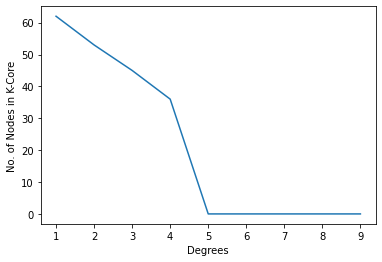

In [14]:
graph=Graph()
for i in edges:
  graph.add_edge(i[0]-1,i[1]-1)
no_nodes_array=[]


for i in range(1,10):
  graph_new,no_nodes=graph.kcores(i)
  no_nodes_array.append(no_nodes)

plt.plot(np.arange(1,10),no_nodes_array)
plt.xlabel("Degrees")
plt.ylabel("No. of Nodes in K-Core")
plt.show()

In [16]:
no_nodes_array

[62, 53, 45, 36, 0, 0, 0, 0, 0]